In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('heart.csv')
df1 = pd.read_csv('o2Saturation.csv')

In [12]:
df.shape

(303, 14)

In [13]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df1.shape

(3585, 1)

In [20]:
X = df.loc[:, ~df.columns.isin(['output'])] 
y = df['output']

In [22]:
X.shape

(303, 13)

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify= y, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [29]:
from sklearn.model_selection import learning_curve
learning_curve(rf, X, y , cv=3)

(array([ 20,  65, 111, 156, 202]),
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([[0.54455446, 0.54455446, 0.54455446],
        [0.54455446, 0.54455446, 0.54455446],
        [0.54455446, 0.54455446, 0.54455446],
        [0.8019802 , 0.82178218, 0.75247525],
        [0.81188119, 0.85148515, 0.79207921]]))

In [30]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(X_test) 

In [34]:
rf.score(X_test,y_test)

0.7368421052631579

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score

Test accuracy: 0.74


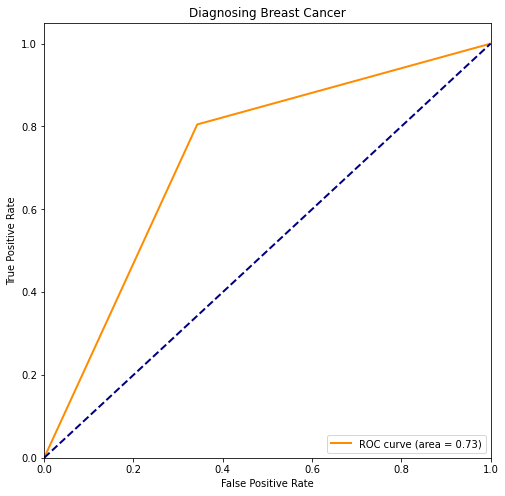

In [36]:
#Accuracy on test set
print(f"Test accuracy: {accuracy_score(y_test, y_pred).round(2)}")

# Confusion matrix test set
pd.DataFrame(
    confusion_matrix(y_test, y_pred)
)

# Compute area under the curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#Set default figure size
plt.rcParams['figure.figsize'] = (8,8)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Diagnosing Breast Cancer")
plt.legend(loc="lower right")
plt.show()


In [37]:
rf.feature_importances_

array([0.07711477, 0.02816128, 0.15772013, 0.06931416, 0.08576806,
       0.00945752, 0.02019831, 0.10826742, 0.05611349, 0.12961042,
       0.05621098, 0.06194762, 0.14011582])

<BarContainer object of 13 artists>

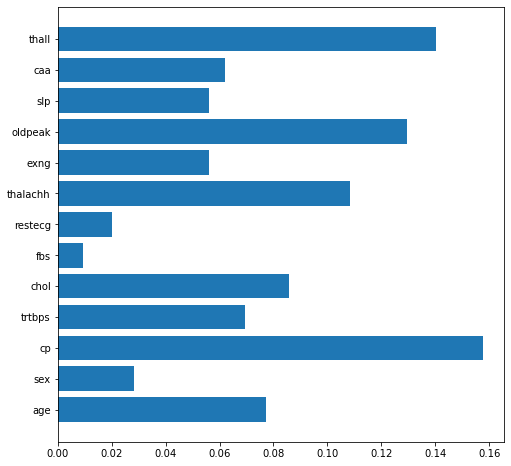

In [41]:
plt.barh(X_train.columns, rf.feature_importances_)

In [42]:
# Feature importance dataframe
imp_df = pd.DataFrame({'feature': X_train.columns.values,
                       'importance': rf.feature_importances_})
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')

<AxesSubplot:>

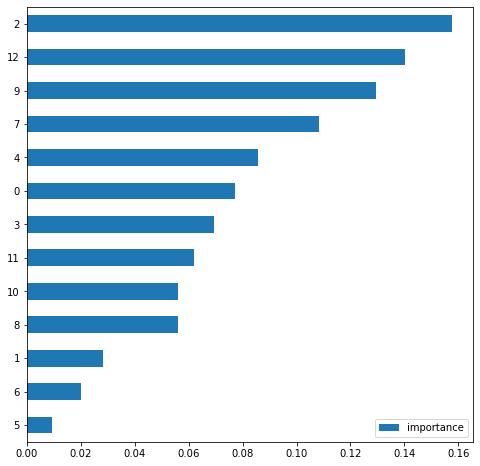

In [45]:
ordered_df.plot(kind='barh')

Analysis Using Shap

In [46]:
!pip install shap

In [49]:
import shap

In [50]:
explainer = shap.TreeExplainer(rf)

In [51]:
shap_values = explainer.shap_values(X_test)

In [66]:
shap_values

[array([[-1.34252640e-02,  2.17225238e-02, -1.08007225e-01,
          1.36803556e-02,  1.73537614e-02,  2.78627815e-04,
         -1.31961600e-02,  8.50682498e-02,  4.22551892e-02,
          1.28860619e-01,  6.48043906e-02,  2.34274745e-02,
          9.54593954e-02],
        [ 1.05265488e-02,  1.43646429e-02,  1.08066495e-01,
          8.66998980e-03, -2.43831609e-03,  1.74635881e-03,
         -6.68435438e-03,  5.99946583e-02,  5.09515499e-02,
          1.04417906e-01,  4.50472298e-02,  3.72026437e-02,
          1.06416586e-01],
        [ 2.40165052e-02,  2.00093412e-02, -7.98719977e-02,
         -1.29264043e-02, -9.04008379e-03,  2.60323400e-03,
          2.06728778e-02, -5.91075678e-02, -2.88486268e-02,
         -4.72244295e-02, -5.09223792e-02,  5.21617197e-02,
         -1.23240251e-01],
        [ 3.80192257e-02,  2.60103144e-02, -1.12537814e-01,
         -8.97501560e-03, -2.29611999e-02,  1.31039370e-02,
          4.50987312e-03, -8.11102977e-03, -4.63328547e-02,
          8.1157080

In [68]:
shap.initjs() #initialize javascript in cell
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

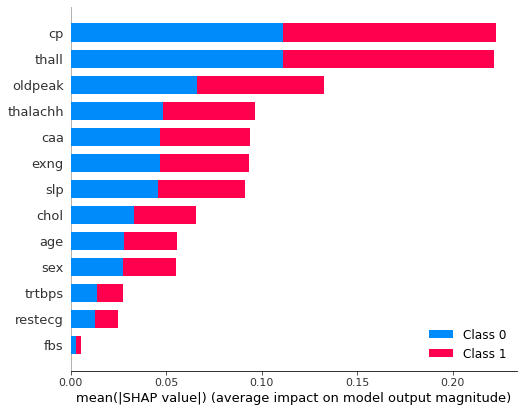

In [57]:
#A summary plot with the shapley value (feature importance) 
shap.summary_plot(shap_values, X_test)

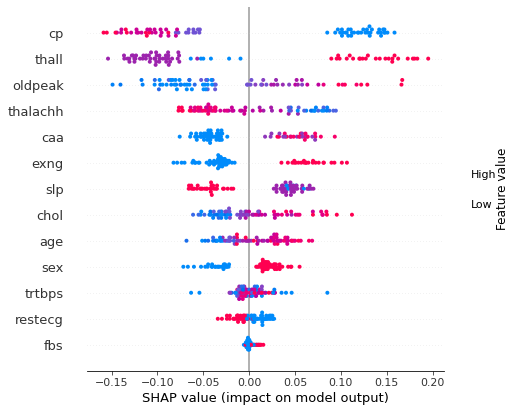

In [59]:
shap.summary_plot(shap_values[0], X_test)